# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

To submit your homework, take the following steps.

1. Save and commit this notebook.
2. Push your changes to GitHub.
3. Confirm that your changes are visible in GitHub.
4. Delete the codespace to avoid wasting your free quota.

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Titanic disaster](https://www.kaggle.com/c/titanic/data) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/titanic))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [ ]:
# # YOUR CODE HERE

# file_path = "titanic.tsv.gz"  

# titanic_data = pd.read_csv(file_path, sep="\t")

# # random sample of 10 rows
# titanic_sample = titanic_data.sample(10)
# print(titanic_sample)


# downloading titanic dataset 
url = "https://github.com/EpistasisLab/pmlb/blob/master/datasets/titanic/titanic.tsv.gz"
file_path = "titanic.tsv.gz"  # Save it locally in the Codespace

# download and save
import os
if not os.path.exists(file_path):
    import urllib.request
    urllib.request.urlretrieve(url, file_path)

# load
import pandas as pd
titanic_data = pd.read_csv(file_path, sep="\t")

# dropping rows w/ missing data
titanic_data = titanic_data.dropna()

# displaying random sample of 10 rows
titanic_sample = titanic_data.sample(10)
print(titanic_sample)


      gender   age  class  embarked  country      fare  sibsp  parch  target
759        0  29.0      0         0      5.0    7.1806    0.0    0.0       0
250        0  37.0      2         0      2.0   25.1109    0.0    0.0       0
2203       0  40.0      4         0      0.0    0.0000    0.0    0.0       1
1764       0  49.0      4         0      0.0    0.0000    0.0    0.0       1
1148       0  57.0      2         1      1.0  146.1005    1.0    0.0       0
200        0  24.0      0         0      3.0    7.1701    0.0    0.0       0
791        1  22.0      0         3      2.0    7.1707    0.0    0.0       1
544        0  21.0      1         0      0.0   73.1000    2.0    0.0       0
474        1  45.0      2         1      1.0   63.0702    0.0    1.0       1
276        1  36.0      0         0      0.0   15.1800    0.0    2.0       1


### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# YOUR CODE HERE

# Llsting all columns in the Titanic dataset

titanic_columns = titanic_data.columns
print("Columns in the Titanic dataset:")
print(titanic_columns)


Columns in the Titanic dataset:
Index(['gender', 'age', 'class', 'embarked', 'country', 'fare', 'sibsp',
       'parch', 'target'],
      dtype='object')


YOUR ANSWERS HERE

Column 1: Gender
This column represents the gender of the passenger or crew member. It's a categorical feature and so it has the binary numerical values (since gender in this context is represented only as males and females), where 0 denotes female and 1 denotes male.


Column 2: Age
The age of the passenger or crew member in years. It's a continuous numerical feature, with missing values potentially representing unknown ages.


Column 3: Class
This column represents the passenger's travel class and assignment of the crew members on the Titanic. It's a categorical feature represented as numerical values, where 0 = 3rd, 1 = 2nd, 2 = 1st, 3 = engineering crew, 4 = victualling crew, 5 = restaurant staff, 6 = deck crew. 


Column 4: Embarked
The port where the passenger embarked on the Titanic. Again a categorical feature encoded as numerical values: 0 for Cherbourg, 1 for Queenstown, and 2 for Southampton. It's also important to note that I used the PMLB link to access the dataset so in this version Embarked is encoded as 0,1,2 and not C, Q and S, which might be the case for other versions of this dataset. 


Column 5: Country
This column indicates the country of origin of the passengers and crew members. According to the dataset descriptions, countries with fewer than 20 entries are grouped into "other". Here are the keys: 0 = England, 1 = United States, 2 = Ireland, 3 = Sweden, 4 = Lebanon, 5 = Finland, 6 = Scotland, 7 = Canada, 8 = Norway, 9 = France, 10 = Belgium, 11 = Northern Ireland, 12 = Wales, 13 = other. 


Column 6: Fare
The fare paid by the passenger for their ticket, measured in British Pounds. It is a continuous numerical feature. And the dataset descriptions also mention that it's 0 for crew members. 


Column 7: SibSp
The number of siblings and or spouses the passenger had aboard the Titanic. It is a discrete numerical feature. For crew members where this value was missing, a value of 0 is inferred.


Column 8: Parch
The number of parents and or children the passenger had aboard the Titanic. It is a discrete numerical feature. For crew members where this value was missing, a value of 0 is inferred.


Column 9: Target
This column is the target variable indicating whether the passenger survived (1) or not (0). It is a binary categorical feature encoded as numerical values and represents the outcome we aim to predict. 

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

Dataset Shape: (2099, 9)

Missing Data:
 gender      0
age         0
class       0
embarked    0
country     0
fare        0
sibsp       0
parch       0
target      0
dtype: int64

Summary Statistics:
             gender          age        class     embarked      country  \
count  2099.000000  2099.000000  2099.000000  2099.000000  2099.000000   
mean      0.221058    30.531682     2.042878     0.469747     2.511672   
std       0.415058    12.182100     1.769639     0.881661     4.099249   
min       0.000000     0.166667     0.000000     0.000000     0.000000   
25%       0.000000    22.000000     0.000000     0.000000     0.000000   
50%       0.000000    29.000000     2.000000     0.000000     0.000000   
75%       0.000000    38.000000     4.000000     1.000000     3.000000   
max       1.000000    74.000000     6.000000     3.000000    13.000000   

              fare        sibsp        parch       target  
count  2099.000000  2099.000000  2099.000000  2099.000000  
mean     18

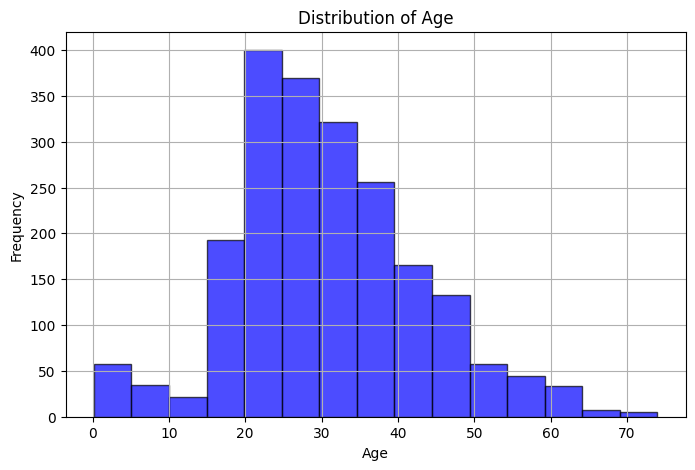

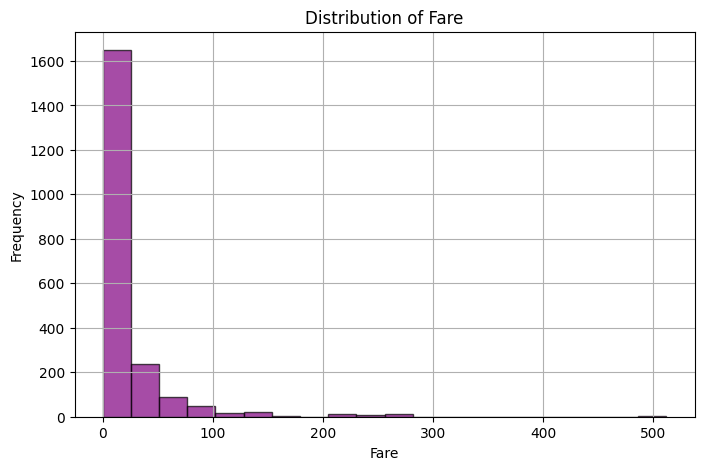

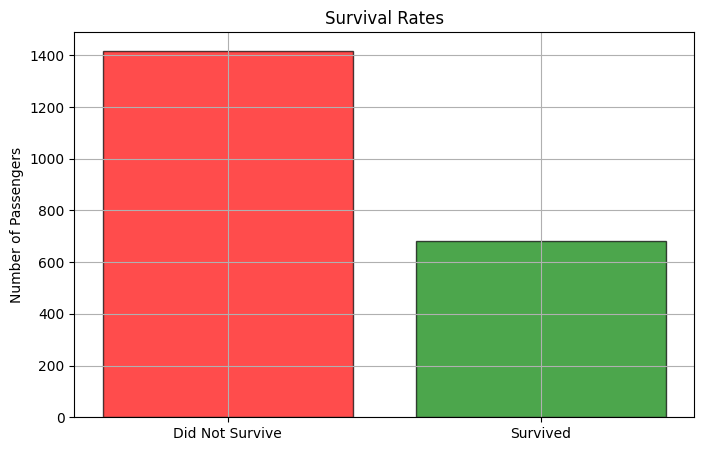

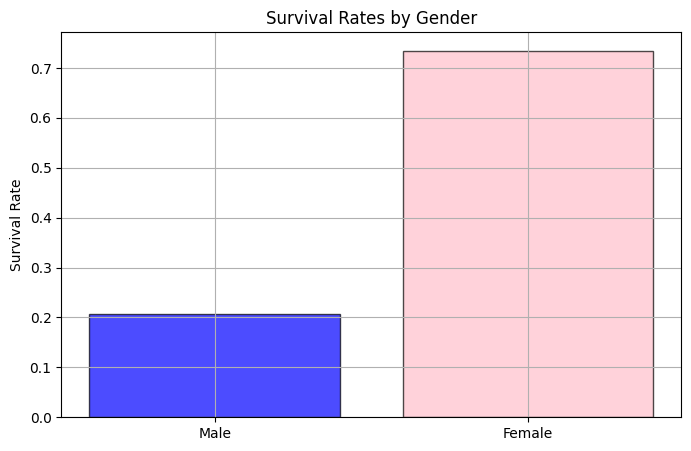

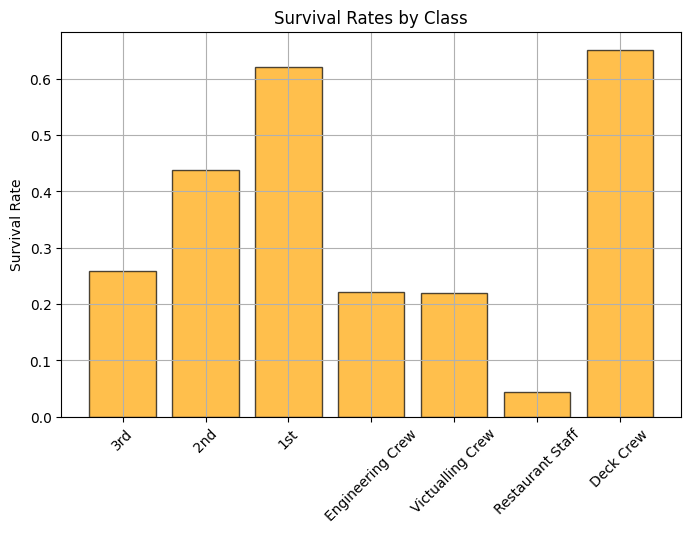

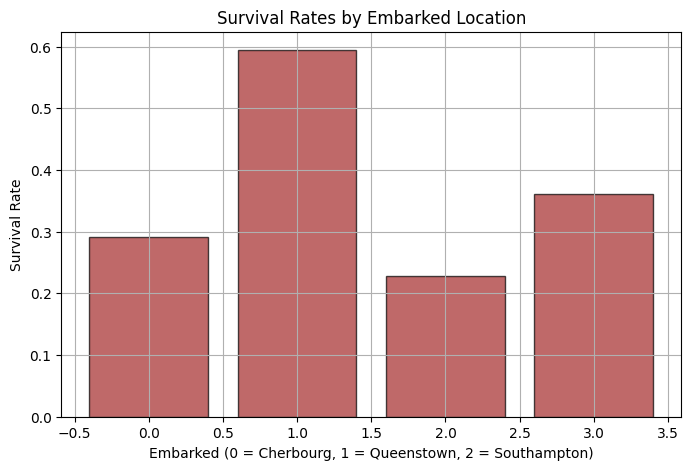

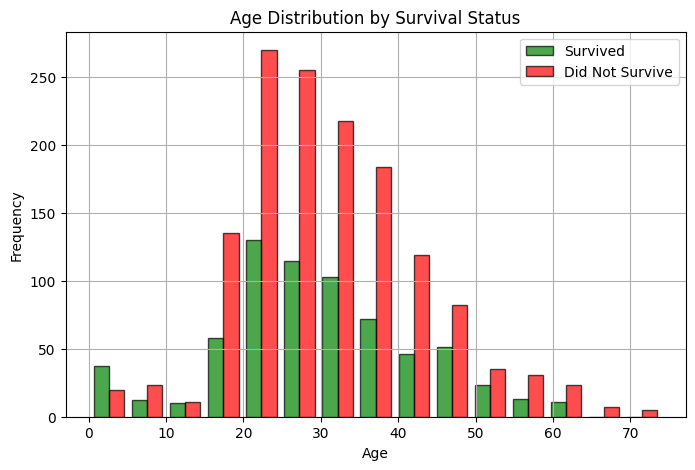

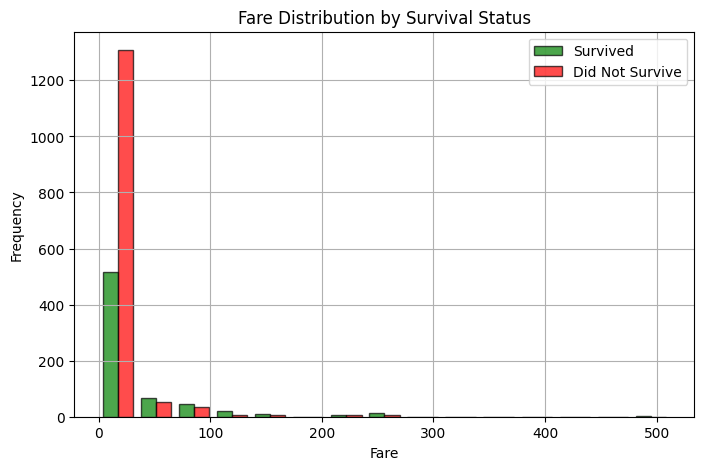

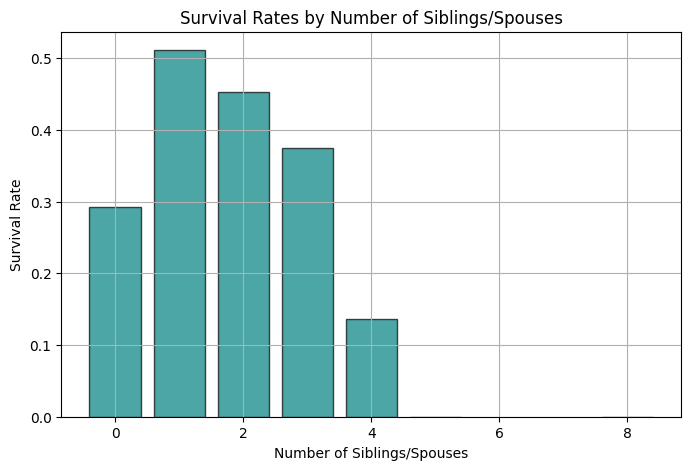

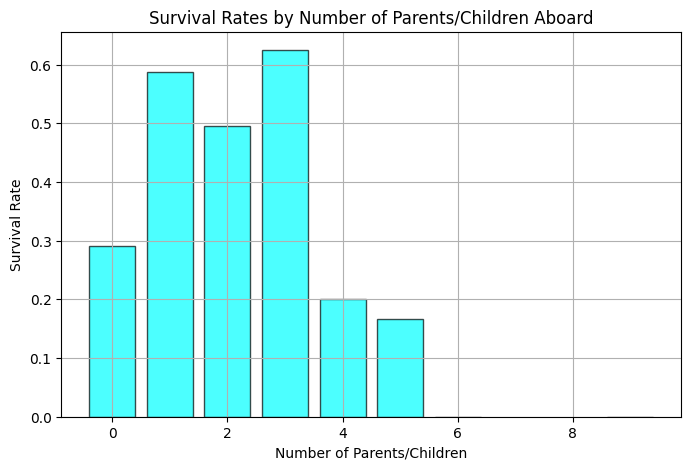

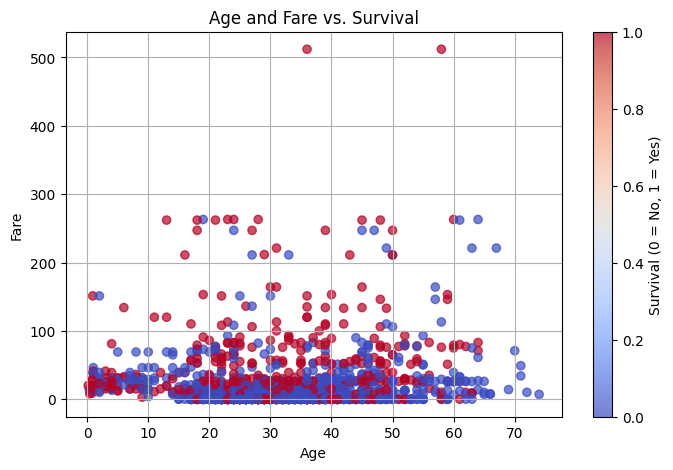

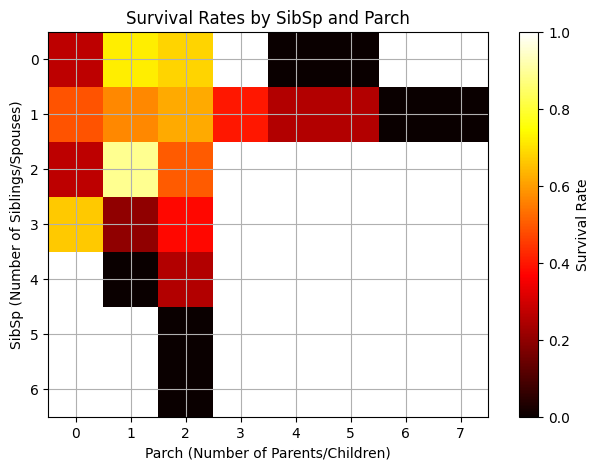

In [5]:
# YOUR CODE HERE

# basic structure and missing data
print("Dataset Shape:", titanic_data.shape)
print("\nMissing Data:\n", titanic_data.isnull().sum())

# summary statistics
print("\nSummary Statistics:\n", titanic_data.describe())

# univariate analysis 

# age distribution
plt.figure(figsize=(8, 5))
plt.hist(titanic_data['age'], bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# fare distribution
plt.figure(figsize=(8, 5))
plt.hist(titanic_data['fare'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# survival rates
survival_counts = titanic_data['target'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(['Did Not Survive', 'Survived'], survival_counts, color=['red', 'green'], alpha=0.7, edgecolor='black')
plt.title('Survival Rates')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# categorical feature analysis 

# gender based survival
gender_survival = titanic_data.groupby('gender')['target'].mean()
plt.figure(figsize=(8, 5))
plt.bar(['Male', 'Female'], gender_survival, color=['blue', 'pink'], edgecolor='black', alpha=0.7)
plt.title('Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

# class based survival
class_survival = titanic_data.groupby('class')['target'].mean()
plt.figure(figsize=(8, 5))
plt.bar(range(len(class_survival)), class_survival, color='orange', edgecolor='black', alpha=0.7)
plt.xticks(range(len(class_survival)), ['3rd', '2nd', '1st', 'Engineering Crew', 'Victualling Crew', 'Restaurant Staff', 'Deck Crew'], rotation=45)
plt.title('Survival Rates by Class')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

# embarked location survival rates
embarked_survival = titanic_data.groupby('embarked')['target'].mean()
plt.figure(figsize=(8, 5))
plt.bar(embarked_survival.index, embarked_survival, color='brown', edgecolor='black', alpha=0.7)
plt.title('Survival Rates by Embarked Location')
plt.xlabel('Embarked (0 = Cherbourg, 1 = Queenstown, 2 = Southampton)')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

# bivariate Analysis 

# age vs survival
plt.figure(figsize=(8, 5))
plt.hist(
    [titanic_data[titanic_data['target'] == 1]['age'], titanic_data[titanic_data['target'] == 0]['age']],
    bins=15, color=['green', 'red'], edgecolor='black', alpha=0.7, label=['Survived', 'Did Not Survive']
)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# fare vs survival
plt.figure(figsize=(8, 5))
plt.hist(
    [titanic_data[titanic_data['target'] == 1]['fare'], titanic_data[titanic_data['target'] == 0]['fare']],
    bins=15, color=['green', 'red'], edgecolor='black', alpha=0.7, label=['Survived', 'Did Not Survive']
)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# survival by number of siblings/spouses (sibsp)
sibsp_survival = titanic_data.groupby('sibsp')['target'].mean()
plt.figure(figsize=(8, 5))
plt.bar(sibsp_survival.index, sibsp_survival, color='teal', edgecolor='black', alpha=0.7)
plt.title('Survival Rates by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

# survival by number of parents/children aboard (parch)
parch_survival = titanic_data.groupby('parch')['target'].mean()
plt.figure(figsize=(8, 5))
plt.bar(parch_survival.index, parch_survival, color='cyan', edgecolor='black', alpha=0.7)
plt.title('Survival Rates by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

# multivariate Analysis 

# age and fare vs survival scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(titanic_data['age'], titanic_data['fare'], c=titanic_data['target'], cmap='coolwarm', alpha=0.7)
plt.title('Age and Fare vs. Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survival (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

# sibsp vs parch survival rates
plt.figure(figsize=(8, 5))
sibsp_parch = titanic_data.groupby(['sibsp', 'parch'])['target'].mean().unstack()
plt.imshow(sibsp_parch, cmap='hot', interpolation='nearest')
plt.title('Survival Rates by SibSp and Parch')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('SibSp (Number of Siblings/Spouses)')
plt.colorbar(label='Survival Rate')
plt.grid(True)
plt.show()


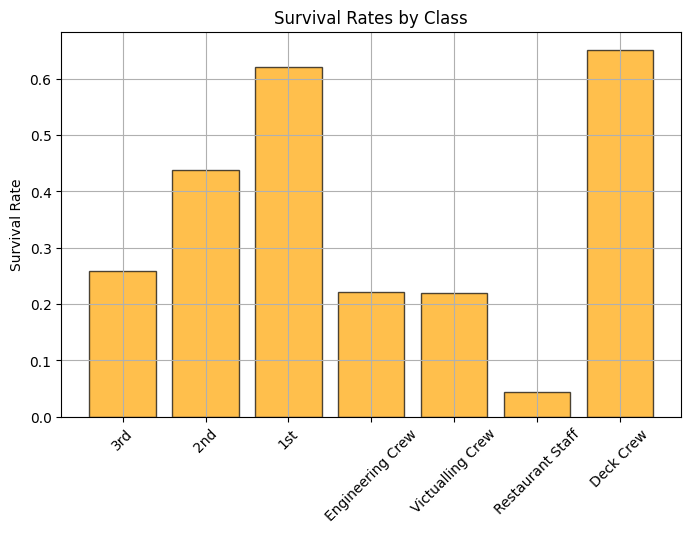

In [6]:
# charts i've selected:


# 1) 

# class-based survival
class_survival = titanic_data.groupby('class')['target'].mean()
plt.figure(figsize=(8, 5))
plt.bar(range(len(class_survival)), class_survival, color='orange', edgecolor='black', alpha=0.7)
plt.xticks(range(len(class_survival)), ['3rd', '2nd', '1st', 'Engineering Crew', 'Victualling Crew', 'Restaurant Staff', 'Deck Crew'], rotation=45)
plt.title('Survival Rates by Class')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()


1st class passengers (class 2) had the highest survival rate, followed by the deck crew (class 6). That demonstrates a clear bias in survival rates linked to socioeconomic status, as 1st class passengers may have had easier access to lifeboats. And for the deck crew, their training or role in the actual management of the ship might have contributed to their survival. Meanwhile, restaurant staff (class 5) exhibited the lowest survival rates. The priority given to passengers over crew during rescue efforts is clearly visible here.

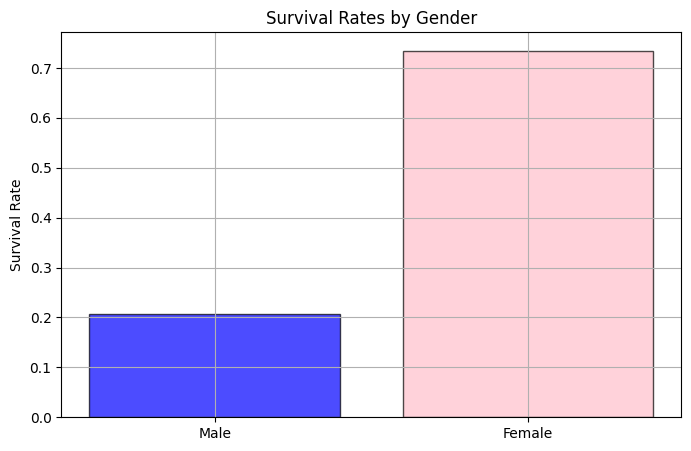

In [7]:
# 2)

# gender-based survival
gender_survival = titanic_data.groupby('gender')['target'].mean()
plt.figure(figsize=(8, 5))
plt.bar(['Male', 'Female'], gender_survival, color=['blue', 'pink'], edgecolor='black', alpha=0.7)
plt.title('Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

This chart reveals a clear gender disparity in survival rates, with females having a significantly higher survival rate than males. This aligns with the well-documented "women and children first" protocol followed during the Titanic disaster (also shown in the James Cameron film). 

It indicates how gender-based societal norms influenced decisions during the evacuation process. 

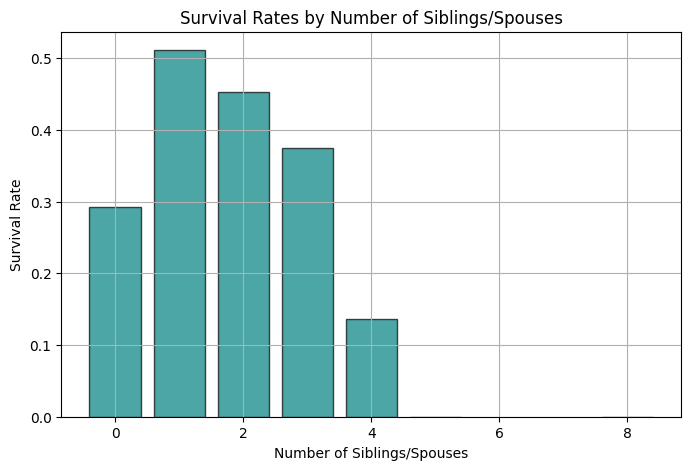

In [8]:
# 3) 

# survival by number of siblings/spouses (sibsp)
sibsp_survival = titanic_data.groupby('sibsp')['target'].mean()
plt.figure(figsize=(8, 5))
plt.bar(sibsp_survival.index, sibsp_survival, color='teal', edgecolor='black', alpha=0.7)
plt.title('Survival Rates by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

This chart is intriguing because it shows how survival rates varied based on the number of siblings or spouses aboard. Passengers with one or two family members had higher survival rates than passengers with 0 family members likely due to mutual support during the evacuation. However, survival rates dropped sharply for those with three or more family members, possibly due to logistical challenges in keeping larger groups together during the chaotic rescue process.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

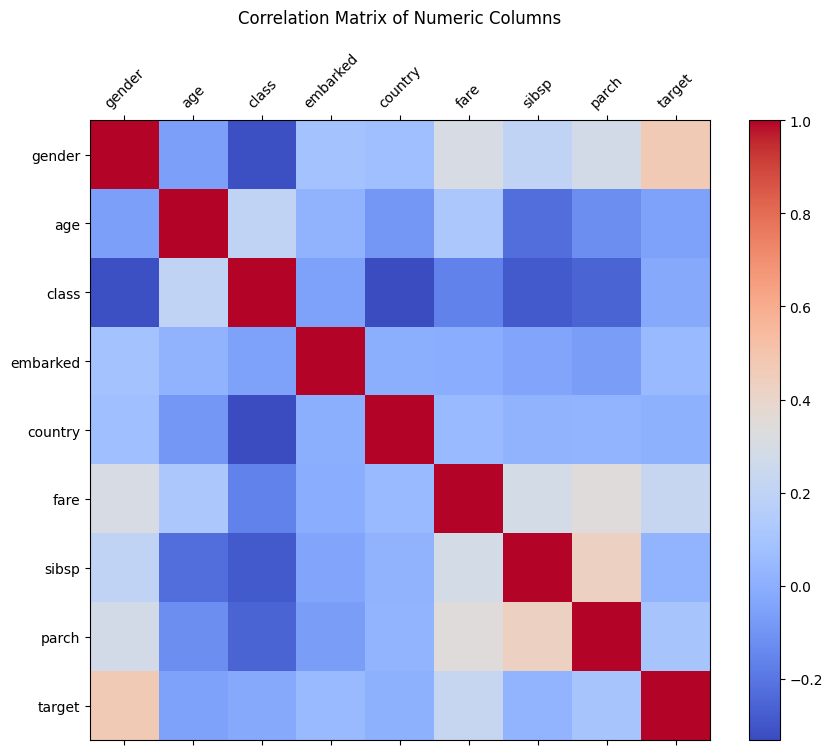

In [9]:
# YOUR CODE HERE

correlation_matrix = titanic_data.corr()

# plotting correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.title("Correlation Matrix of Numeric Columns", pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

YOUR ANSWERS HERE

The most correlated pair of columns in the heatmap are "sibsp" (number of siblings/spouses aboard) and "parch" (number of parents/children aboard), as indicated by the bright red color reflecting a correlation close to 1.0. This strong relationship exists because passengers traveling in families often had both siblings/spouses and parents/children with them, reflecting family-oriented group travel. For instance, a family with multiple children or extended relatives aboard would naturally have high values in both columns. 

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [6]:
# YOUR CODE HERE

# 1) 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://en.wikipedia.org/wiki/Linear_regression

# 2)
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
# https://en.wikipedia.org/wiki/Gradient_boosting

# 3) 
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
# https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm


YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

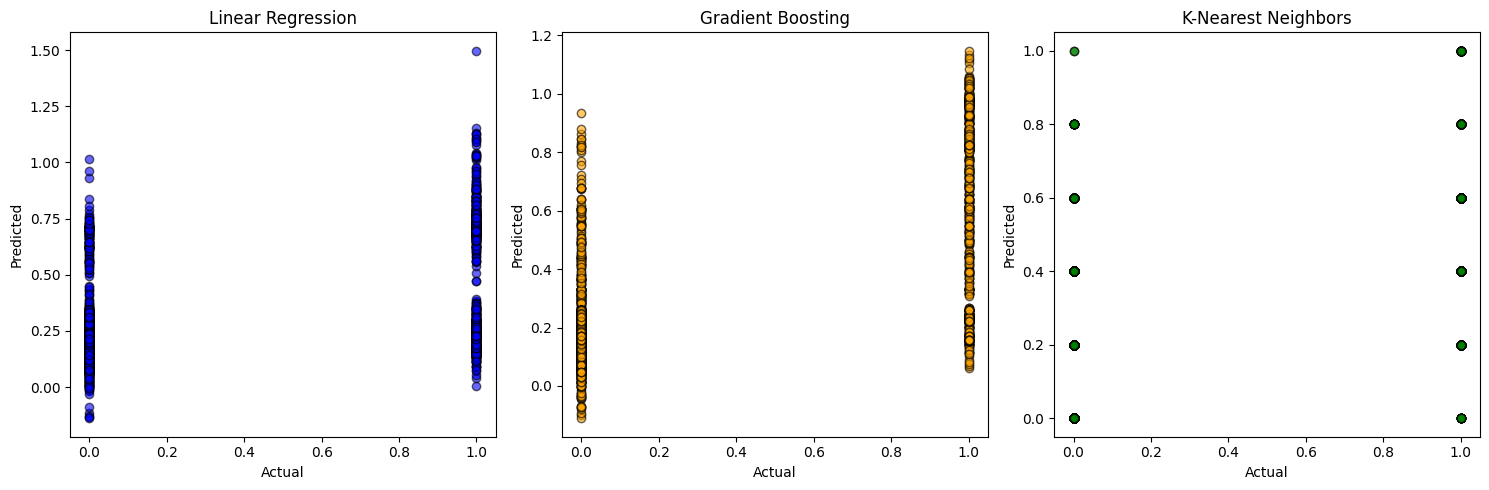

Linear Regression L2 Loss: 0.16281334977308126
Linear Regression L1 Loss: 0.32807840968598395
Gradient Boosting L2 Loss: 0.12486486423217652
Gradient Boosting L1 Loss: 0.27017641903779865
K-Nearest Neighbors L2 Loss: 0.15003334921391143
K-Nearest Neighbors L1 Loss: 0.2931872320152454


In [7]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# features and target
X = titanic_data.drop(columns=['target'])  # Drop the target column
y = titanic_data['target']  # Target variable

# model 1: linear regression
model1 = LinearRegression()
model1.fit(X, y)
y_pred1 = model1.predict(X)

# model 2: gradient boosting regressor
model2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model2.fit(X, y)
y_pred2 = model2.predict(X)

# model 3: knn regressor
model3 = KNeighborsRegressor(n_neighbors=5)
model3.fit(X, y)
y_pred3 = model3.predict(X)


plt.figure(figsize=(15, 5))

# linear regression
plt.subplot(1, 3, 1)
plt.scatter(y, y_pred1, alpha=0.6, color='blue', edgecolor='k')
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# gradient boosting
plt.subplot(1, 3, 2)
plt.scatter(y, y_pred2, alpha=0.6, color='orange', edgecolor='k')
plt.title('Gradient Boosting')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# k nearest neighbors
plt.subplot(1, 3, 3)
plt.scatter(y, y_pred3, alpha=0.6, color='green', edgecolor='k')
plt.title('K-Nearest Neighbors')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# L2 and L1 losses 
print("Linear Regression L2 Loss:", mean_squared_error(y, y_pred1))
print("Linear Regression L1 Loss:", mean_absolute_error(y, y_pred1))

print("Gradient Boosting L2 Loss:", mean_squared_error(y, y_pred2))
print("Gradient Boosting L1 Loss:", mean_absolute_error(y, y_pred2))

print("K-Nearest Neighbors L2 Loss:", mean_squared_error(y, y_pred3))
print("K-Nearest Neighbors L1 Loss:", mean_absolute_error(y, y_pred3))


YOUR ANSWERS HERE

Linear Regression: The scatter plot for the Linear Regression model shows significant scatter and variability between the actual and predicted values, particularly near extreme values of the target variable (0 and 1). This pattern suggests that the Linear Regression model struggles to capture the complexity of the relationships within the dataset, likely due to its assumption of linearity. The relatively higher L2 (0.162) and L1 (0.320) losses further indicate suboptimal performance compared to other models. The limitations include potential underfitting, as the model cannot adapt well to any nonlinear patterns present in the data.

Gradient Boosting: The Gradient Boosting model demonstrates a tighter clustering of predicted values around the actual values, as evident in the scatter plot. This indicates that the model captures patterns in the data better than Linear Regression. The lower L2 (0.125) and L1 (0.270) losses reflect its improved predictive accuracy. However, while Gradient Boosting is less prone to underfitting, there is a risk of overfitting, especially if the model complexity is increased further (e.g., by adding more trees or depth). It performs well in this case but requires careful tuning to avoid overfitting.

K-Nearest Neighbors (KNN): The K-Nearest Neighbors model shows discrete clusters of predicted values, mirroring the binary nature of the target variable. While this is promising for classification-like tasks, it can be limiting for regression, as seen here. The model achieves moderate performance with L2 (0.150) and L1 (0.293) losses. The discrete predictions suggest that KNN may struggle with underfitting when faced with continuous relationships or noisy data, as it relies heavily on local information without capturing global patterns.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

5-Fold Cross-Validation L2 Losses:
Linear Regression: 0.1661
Gradient Boosting: 0.1561
K-Nearest Neighbors: 0.1783

L2 Losses Using Entire Dataset for Training:
Linear Regression: 0.1628
Gradient Boosting: 0.1249
K-Nearest Neighbors: 0.1228


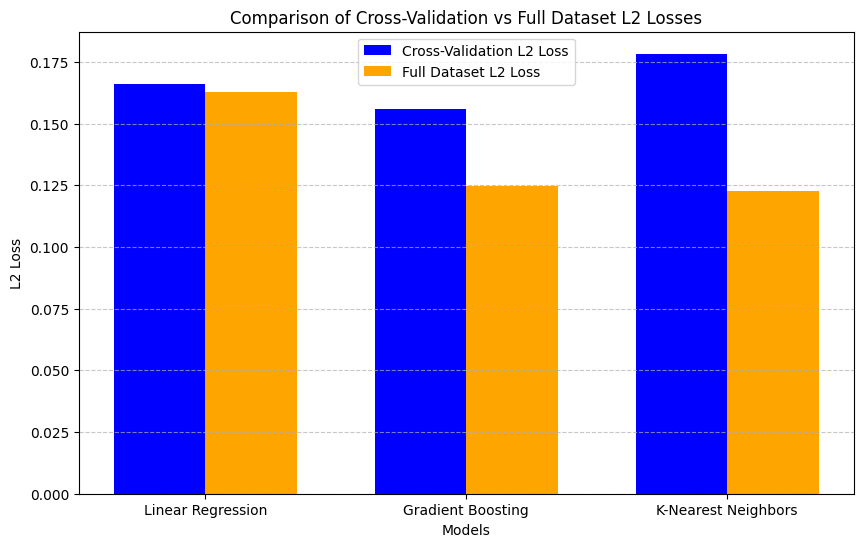


Insights:
Linear Regression:
  Cross-Validation L2 Loss: 0.1661
  Full Dataset L2 Loss: 0.1628
  Difference: -0.0033
Gradient Boosting:
  Cross-Validation L2 Loss: 0.1561
  Full Dataset L2 Loss: 0.1249
  Difference: -0.0312
K-Nearest Neighbors:
  Cross-Validation L2 Loss: 0.1783
  Full Dataset L2 Loss: 0.1228
  Difference: -0.0555


In [8]:

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


# standardising knn features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# modeling 
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# x val L2 losses
print("5-Fold Cross-Validation L2 Losses:")
cv_l2_losses = {}
for model_name, model in models.items():
    if model_name == "K-Nearest Neighbors":
        cv_scores = -cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    else:
        cv_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = np.mean(cv_scores)
    cv_l2_losses[model_name] = mean_cv_score
    print(f"{model_name}: {mean_cv_score:.4f}")

# full dataset L2 losses
print("\nL2 Losses Using Entire Dataset for Training:")
full_data_l2_losses = {}
for model_name, model in models.items():
    if model_name == "K-Nearest Neighbors":
        model.fit(X_scaled, y)
        y_pred = model.predict(X_scaled)
    else:
        model.fit(X, y)
        y_pred = model.predict(X)
    full_data_l2_loss = mean_squared_error(y, y_pred)
    full_data_l2_losses[model_name] = full_data_l2_loss
    print(f"{model_name}: {full_data_l2_loss:.4f}")

# plot comparison
labels = list(models.keys())
x = np.arange(len(labels))
width = 0.35

cv_losses = [cv_l2_losses[model] for model in labels]
full_losses = [full_data_l2_losses[model] for model in labels]

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, cv_losses, width, label='Cross-Validation L2 Loss', color='blue')
plt.bar(x + width/2, full_losses, width, label='Full Dataset L2 Loss', color='orange')

plt.xlabel('Models')
plt.ylabel('L2 Loss')
plt.title('Comparison of Cross-Validation vs Full Dataset L2 Losses')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Insights
print("\nInsights:")
for model_name in labels:
    print(f"{model_name}:")
    print(f"  Cross-Validation L2 Loss: {cv_l2_losses[model_name]:.4f}")
    print(f"  Full Dataset L2 Loss: {full_data_l2_losses[model_name]:.4f}")
    print(f"  Difference: {full_data_l2_losses[model_name] - cv_l2_losses[model_name]:.4f}")


YOUR ANSWERS HERE

The results show that all three models exhibit minimal overfitting, as the differences between cross-validation losses and full-dataset losses are relatively small. Gradient Boosting performed the best, with the lowest L2 loss and a small difference between the two evaluations. Linear Regression also demonstrated consistent performance with minimal overfitting, while K-Nearest Neighbors showed the largest difference, which means a higher sensitivity to overfitting. 

So gradient boosting is the best model for this dataset. 

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

L2 Losses with Standardized Features:
Linear Regression: 0.1628
Gradient Boosting: 0.1249
K-Nearest Neighbors: 0.1228


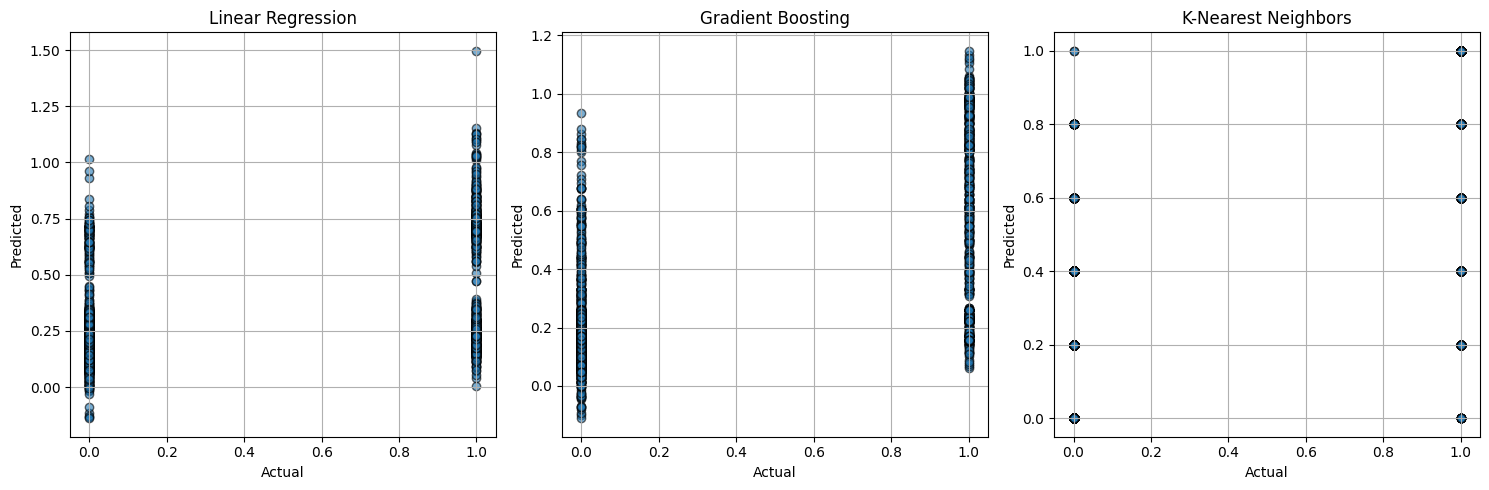


Comparison of L2 Losses with Question 6:
Linear Regression:
  L2 Loss with Standardized Features: 0.1628
  L2 Loss in Question 6: 0.1628
  Difference: 0.0000
Gradient Boosting:
  L2 Loss with Standardized Features: 0.1249
  L2 Loss in Question 6: 0.1249
  Difference: -0.0000
K-Nearest Neighbors:
  L2 Loss with Standardized Features: 0.1228
  L2 Loss in Question 6: 0.1500
  Difference: -0.0272


In [9]:
# YOUR CODE HERE
from sklearn.pipeline import Pipeline

# models w/ scikit pipeline
models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    "Gradient Boosting": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0))
    ]),
    "K-Nearest Neighbors": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', KNeighborsRegressor(n_neighbors=5))
    ])
}

# fit models and calc L2 losses
l2_losses = {}
y_preds = {}
print("L2 Losses with Standardized Features:")
for model_name, model in models.items():
    model.fit(X, y)  # Train the model
    y_pred = model.predict(X)  # Predict on the entire dataset
    l2_loss = mean_squared_error(y, y_pred)  # Calculate L2 loss
    l2_losses[model_name] = l2_loss
    y_preds[model_name] = y_pred
    print(f"{model_name}: {l2_loss:.4f}")

# actual vs predicted vals for each model
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for i, (model_name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y, y_pred, alpha=0.6, edgecolor='k')
    plt.title(model_name)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)

plt.tight_layout()
plt.show()

# comparing L2 losses w/ q6
question_6_losses = {
    "Linear Regression": 0.1628,
    "Gradient Boosting": 0.1249,
    "K-Nearest Neighbors": 0.1500
}

print("\nComparison of L2 Losses with Question 6:")
for model_name in models.keys():
    diff = l2_losses[model_name] - question_6_losses[model_name]
    print(f"{model_name}:")
    print(f"  L2 Loss with Standardized Features: {l2_losses[model_name]:.4f}")
    print(f"  L2 Loss in Question 6: {question_6_losses[model_name]:.4f}")
    print(f"  Difference: {diff:.4f}")

YOUR ANSWERS HERE

In Linear Regression, there was no change in the L2 loss compared to Question 6, as this model is inherently unaffected by feature scaling. The scatter plot remained consistent, reflecting the model's limited ability to capture variance in the target variable. 

Gradient Boosting showed no difference in performance, with identical L2 losses before and after standardization. 

However, K-Nearest Neighbors (KNN) demonstrated significant improvement after standardization, with the L2 loss decreasing from 0.1500 to 0.1228. Since KNN relies on distance metrics, standardizing features ensures equal contribution from all variables, enhancing its predictive accuracy. The scatter plot for KNN shows better alignment between actual and predicted values. 

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

My response to the colleague:

"I appreciate the suggestion, but building a thousand random decision trees with arbitrary depth limits is inefficient compared to using methods that are more systematic like grid search or random search with cross validation, and these explore hyperparameter spaces more effectively to optimize performance."

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In my opinion, as a beginner in data science, the Gradient Boosting Regressor is the best-performing model I built in this project. It consistently had the lowest L2 losses across all scenarios, showing strong accuracy and reliability. For example, in Question 6, it achieved an L2 loss of 0.1249, outperforming Linear Regression and K-Nearest Neighbors. This performance stayed consistent during 5-fold cross-validation in Question 7, with an L2 loss of 0.1561, and it showed minimal overfitting compared to other models. Even after standardizing features in Question 8, its L2 loss remained at 0.1249. 

In contrast, Linear Regression struggled with higher L2 losses (e.g., 0.1628 in both Questions 6 and 8) and couldn’t handle the non-linear relationships in the dataset, such as how survival depends on complex interactions between class, gender, and fare. K-Nearest Neighbors (KNN) showed some improvement with standardization, but its L2 loss of 0.1228 still didn’t match Gradient Boosting. KNN relies heavily on local patterns, which made it less effective at capturing the global trends in the data.

I think Gradient Boosting’s ability to capture non-linear relationships and interactions between features makes it the best choice for this dataset. For instance, survival rates are influenced by nuanced factors like the higher survival chances of women (given priority over men) in first class (also prioritized over other classes) or the diminishing returns of higher fares (there comes a point where increasing the fare further does not necessarily lead to a significant improvement in survival probability). Because of all these reasons, Gradient Boosting from question 6 was to me my best model in this project. 